## Today's Practice Topics
1. ### Data Plotting
2. ### Generating Samples
3. ### Regression (Overfitting, underfitting)
4. ### Data Loading
5. ### Classification

In [29]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn

### Matplotlib Example

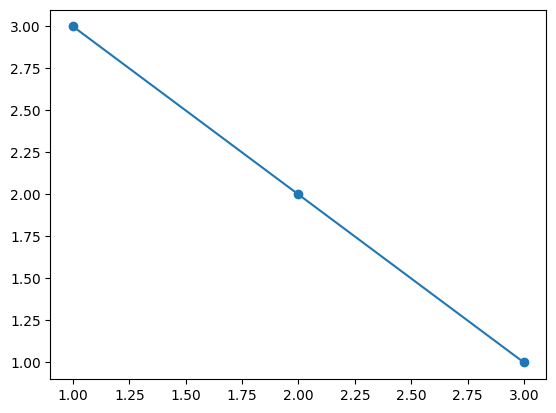

In [30]:
plt.plot([1,2,3], [3,2,1])
plt.scatter([1,2,3], [3,2,1])
plt.show()

In [34]:
def draw_plot(X, Y, x_sample, y_sample):
    for i in range(len(X)):
        plt.plot(X[i], Y[i])
    plt.scatter(x_sample, y_sample)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show()

### Drawing a function

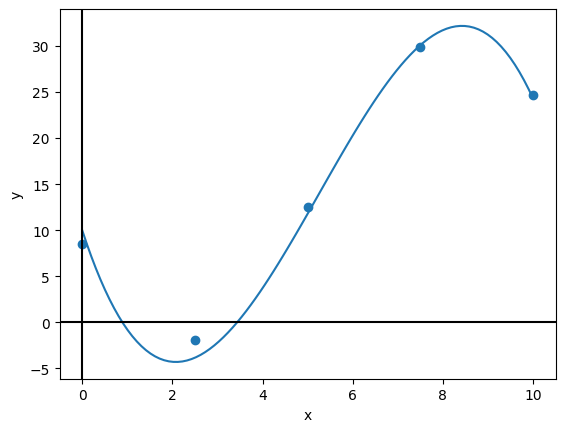

In [35]:
foo = lambda x: -(2/7*x**3-9/2*x**2+15*x-10.)
x_line = np.linspace(0, 10, 100)
# print(x_line)

# Quiz: Draw the function foo using x_line
y_line = foo(x_line)
# plt.plot(x_line, y_line)
# plt.show()

# Quiz: Sample 5 points of foo in the domain [0, 10] and visualize with draw_plot
# x_sample = np.random.uniform(0, 10, 5)
# y_sample = foo(x_sample)
# draw_plot([x_line], [y_line], x_sample, y_sample)

# Quiz: Sample 5 points of foo in the domain [0, 10] with Gaussian noise where mu=0, sigma=0.1 and visualize.
sample_size = 5
x_sample = np.linspace(0, 10, sample_size)
np.random.seed(200)
y_sample = foo(x_sample) + np.random.normal(loc=0, scale=1, size=sample_size)
draw_plot([x_line], [y_line], x_sample, y_sample)

### Linear Regression

R^2:0.632018
[ 0.   2.5  5.   7.5 10. ]
[ 8.54905175 -1.92833258 12.49759344 29.84154743 24.64718052]
[ 1.9281806   8.32479436 14.72140811 21.11802187 27.51463562]
47.64601908459361


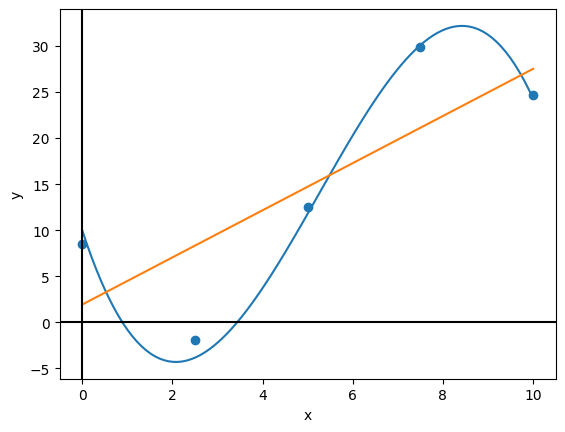

In [36]:
from sklearn.linear_model import LinearRegression

# Defining a linear regression model.
lr = LinearRegression()

# Training the linear regression model.
lr.fit(x_sample[:, None], y_sample)

# Coefficient of Determination (i.e. R^2, R Squared)
r2 = lr.score(x_sample[:, None], y_sample)
print("R^2:%f" % r2)

# Predicting data points.
y_hat = lr.predict(x_sample[:, None])
print(x_sample)
print(y_sample)
print(y_hat)

# # Quiz: Calculate Mean Squared Error using x_sample and y_sample and lr.predict()
#print(x_sample.size)
mse = ((y_hat-y_sample)**2).sum() / x_sample.size
print(mse)

# Quiz: Use x_line, lr.predict() and draw_plot to visualize the linear regression model,
#       in comparison with the original function foo.
y_pred_line = lr.predict(x_line[:, None])
draw_plot([x_line, x_line], [y_line, y_pred_line], x_sample, y_sample)

### Polynomial Regression

[[ 0. ]
 [ 2.5]
 [ 5. ]
 [ 7.5]
 [10. ]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.50000000e+00 6.25000000e+00 1.56250000e+01
  3.90625000e+01 9.76562500e+01 2.44140625e+02]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01 1.25000000e+02
  6.25000000e+02 3.12500000e+03 1.56250000e+04]
 [1.00000000e+00 7.50000000e+00 5.62500000e+01 4.21875000e+02
  3.16406250e+03 2.37304688e+04 1.77978516e+05]
 [1.00000000e+00 1.00000000e+01 1.00000000e+02 1.00000000e+03
  1.00000000e+04 1.00000000e+05 1.00000000e+06]]


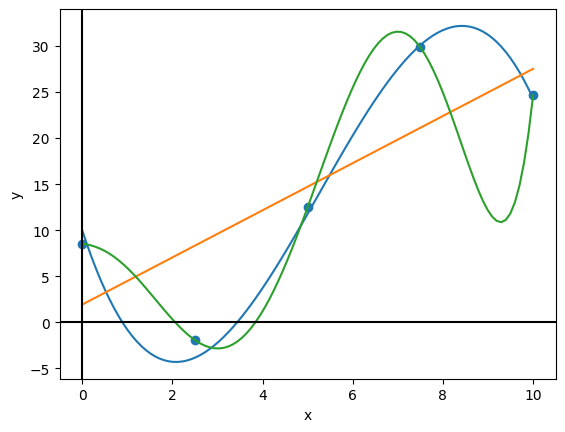

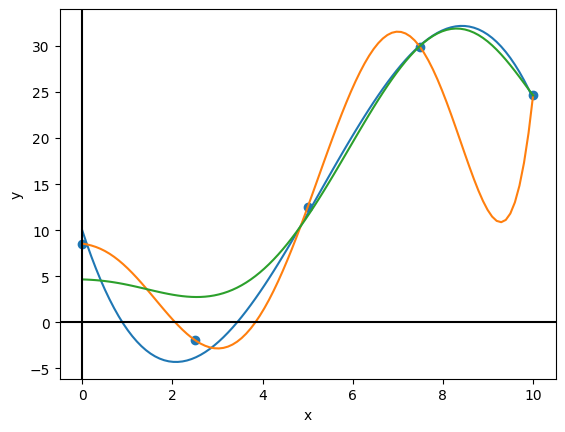

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Defining a polynomial feature transformer.
poly = PolynomialFeatures(degree=6)

# Transform the original features to polynomial features.
x_sample_poly = poly.fit_transform(x_sample[:, None])

print(x_sample[:, None])
print(x_sample_poly)

# Train a linear regression model using the polynomial features.
pr = LinearRegression().fit(x_sample_poly, y_sample)
x_poly_line = poly.fit_transform(x_line[:, None])

# Quiz: Visualize the polynomial regression model, in comparison with foo.
pr_line = pr.predict(x_poly_line)
# print(pr_line)
draw_plot([x_line, x_line, x_line], [y_line, y_pred_line, pr_line], x_sample, y_sample)

rr = Ridge(alpha=50.0).fit(x_sample_poly, y_sample)
rr_line = rr.predict(x_poly_line)

draw_plot([x_line, x_line, x_line], [y_line, pr_line, rr_line], x_sample, y_sample)

# Quiz: What happens if you increase/decrease the degree of the polynomial?

### Iris Dataset

In [42]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [44]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Classifiers

In [56]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=1234)
logistic.fit(X_train[:, :2], y_train)
#logistic.score(X_train[:, :2], y_train)
print(logistic.score(X_test[:, :2], y_test))


# Quiz: Import Support Vector Machine, then train SVM
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='poly', degree=3)
svc.fit(X_train[:, :2], y_train)
print(svc.score(X_test[:, :2], y_test))

# # Quiz: Import Decision Tree, then train DT
from sklearn.tree import DecisionTreeClassifier as DTC
tree = DTC(max_depth=2, random_state=1234)
tree.fit(X_train[:, :2], y_train)
print(tree.score(X_test[:, :2], y_test))

0.7333333333333333
0.7333333333333333
0.5666666666666667


In [ ]:
# Quiz: Use the model's predict() to calculate the test accuracy.

y_svc = svc.predict(X_test[:, :2])
#print(y_svc)
#print((y_test == y_svc).mean())
print(logistic.score(X_test[:, :2], y_test))
print(svc.score(X_test[:, :2], y_test))
print(tree.score(X_test[:, :2], y_test))

0.7333333333333333
0.7333333333333333
0.5666666666666667


In [ ]:
# Quiz: Use various model options, features, and the score() fuction to compare performance.

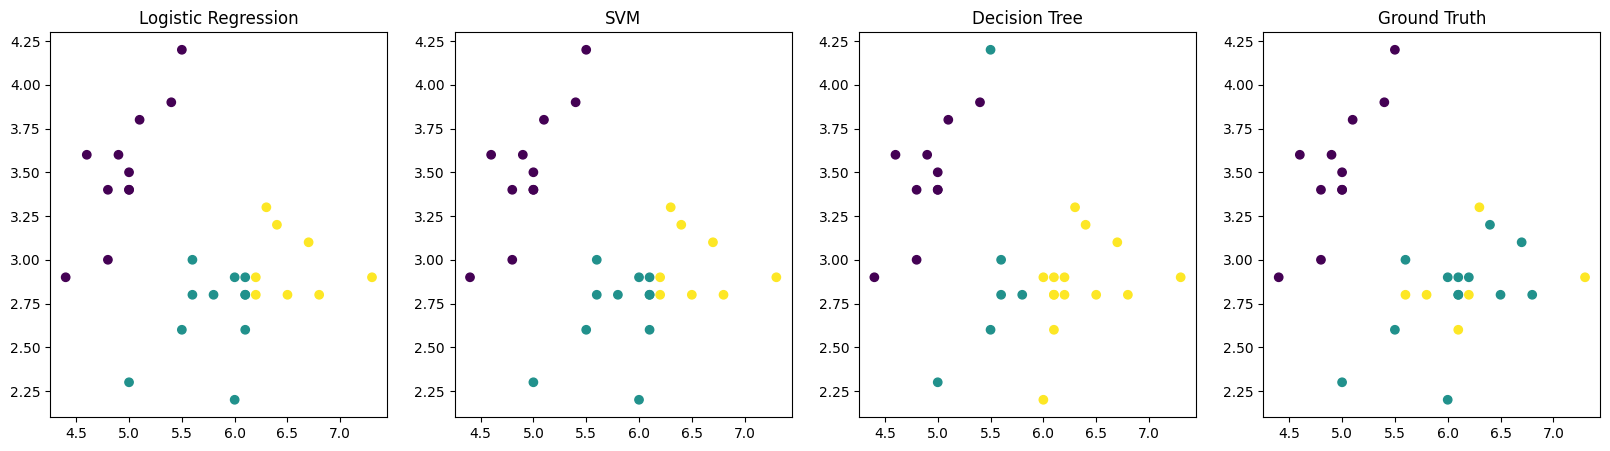

In [57]:
y_logistic = logistic.predict(X_test[:, :2])
y_svc = svc.predict(X_test[:, :2])
y_tree = tree.predict(X_test[:, :2])
# Quiz: Can you draw four scatterplots for each model's predictions and the true labels? (Example shown below)
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Logistic Regression')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_logistic)

plt.subplot(142)
plt.title('SVM')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_svc)

plt.subplot(143)
plt.title('Decision Tree')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_tree)

plt.subplot(144)
plt.title('Ground Truth')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

plt.show()

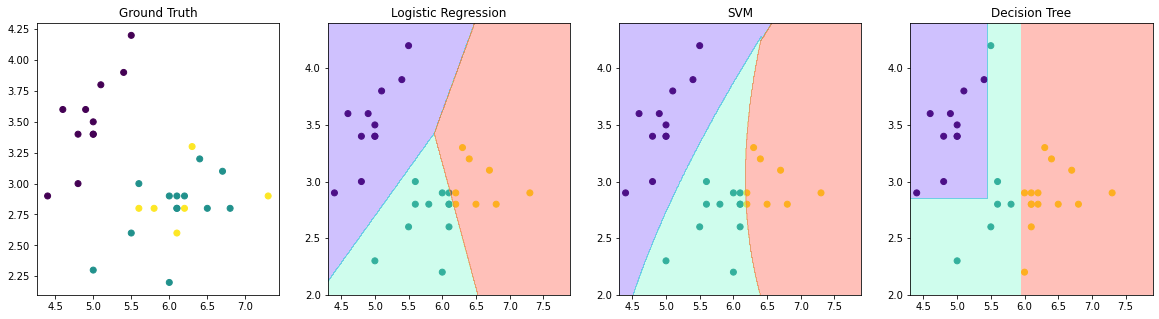

In [13]:
# Drawing the decision boundary of each model. (code by SungMin Kim)
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Ground Truth')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)


plt.subplot(142)
plt.title('Logistic Regression')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_logistic)

grid_size = 500
A, B = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), grid_size),
                   np.linspace(X[:, 1].min(), X[:, 1].max(), grid_size))
C = logistic.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3, cmap=plt.cm.rainbow)


plt.subplot(143)
plt.title('SVM')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_svc)

grid_size = 500
A, B = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), grid_size),
                   np.linspace(X[:, 1].min(), X[:, 1].max(), grid_size))
C = svc.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3, cmap=plt.cm.rainbow)


plt.subplot(144)
plt.title('Decision Tree')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_tree)

grid_size = 500
A, B = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), grid_size),
                   np.linspace(X[:, 1].min(), X[:, 1].max(), grid_size))
C = tree.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3, cmap=plt.cm.rainbow)


plt.show()